# Support Vector Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from collections import Counter

In [121]:
# Lets create synthetic data points
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0,random_state=42)

In [122]:
X[:5]

array([[-0.99910178, -0.66386   ],
       [ 1.24668618,  1.15359685],
       [ 0.96277683,  0.85939747],
       [-2.95744095,  2.03364529],
       [ 1.14116527,  1.05944863]])

In [123]:
y[:5]

array([1, 1, 1, 1, 1])

In [124]:
X_df = pd.DataFrame(X)

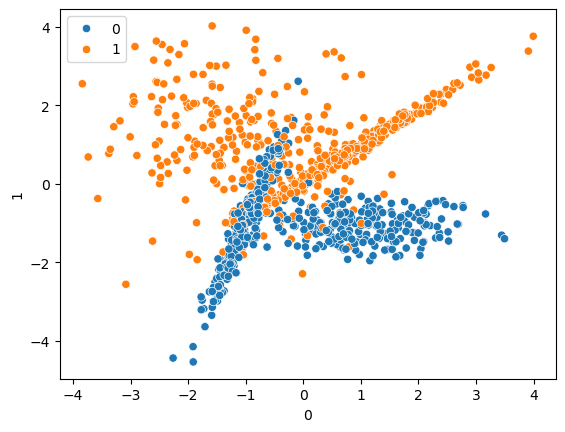

In [125]:
sns.scatterplot(x=X_df[0],y=X_df[1],hue=y);

In [ ]:
fig = px.scatter_3d(df, x='X1_square', y='X2_square', z='X1*X2', color='Y')
fig.show()

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [127]:
from sklearn.svm import SVC

In [128]:
svc = SVC(kernel='linear')

In [129]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [130]:
y_preds = svc.predict(X_test)

In [131]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_preds))
print(confusion_matrix(y_test,y_preds))
print(classification_report(y_test,y_preds))

0.89
[[90 10]
 [12 88]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       100
           1       0.90      0.88      0.89       100

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



In [136]:
# Using RBF Kernel (Radial Basis Kernel)
rbf = SVC(kernel='rbf').fit(X_train,y_train)
y_preds_rbf = rbf.predict(X_test)

print(accuracy_score(y_test,y_preds_rbf))
print(confusion_matrix(y_test,y_preds_rbf))
print(classification_report(y_test,y_preds_rbf))

0.915
[[94  6]
 [11 89]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       100
           1       0.94      0.89      0.91       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200



## If Data is not linearly separable

In [137]:
# Using Polynomial Kernel
polynomial = SVC(kernel='poly').fit(X_train,y_train)
y_preds_poly = polynomial.predict(X_test)

print(accuracy_score(y_test,y_preds_poly))
print(confusion_matrix(y_test,y_preds_poly))
print(classification_report(y_test,y_preds_poly))

0.84
[[72 28]
 [ 4 96]]
              precision    recall  f1-score   support

           0       0.95      0.72      0.82       100
           1       0.77      0.96      0.86       100

    accuracy                           0.84       200
   macro avg       0.86      0.84      0.84       200
weighted avg       0.86      0.84      0.84       200



In [138]:
# Using Sigmoid Kernel
sigmoid = SVC(kernel='sigmoid').fit(X_train,y_train)
y_preds_sigmoid = sigmoid.predict(X_test)

print(accuracy_score(y_test,y_preds_sigmoid))
print(confusion_matrix(y_test,y_preds_sigmoid))
print(classification_report(y_test,y_preds_sigmoid))

0.76
[[74 26]
 [22 78]]
              precision    recall  f1-score   support

           0       0.77      0.74      0.76       100
           1       0.75      0.78      0.76       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



In [140]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

param_grid = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf','sigmoid','linear','poly']
}

In [144]:
grid_svm = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5),
    refit=True,
    verbose=3,
)

In [145]:
grid_svm.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.894 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.894 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.831 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.731 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.725 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.706 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.706 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.706 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.838 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linea

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid', 'linear', 'poly']},
             verbose=3)

In [149]:
grid_svm.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [150]:
y_pred_grid_svm = grid_svm.predict(X_test)

In [151]:
print(accuracy_score(y_test,y_pred_grid_svm))
print(confusion_matrix(y_test,y_pred_grid_svm))
print(classification_report(y_test,y_pred_grid_svm))

0.91
[[97  3]
 [15 85]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       100
           1       0.97      0.85      0.90       100

    accuracy                           0.91       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.91      0.91       200

